Загальна сума продажів за всіма клієнтами: 2850
Середня сума продажів по клієнтах:
name
Іван         750.0
Марія        300.0
Олександр    375.0
Name: total_sale, dtype: float64


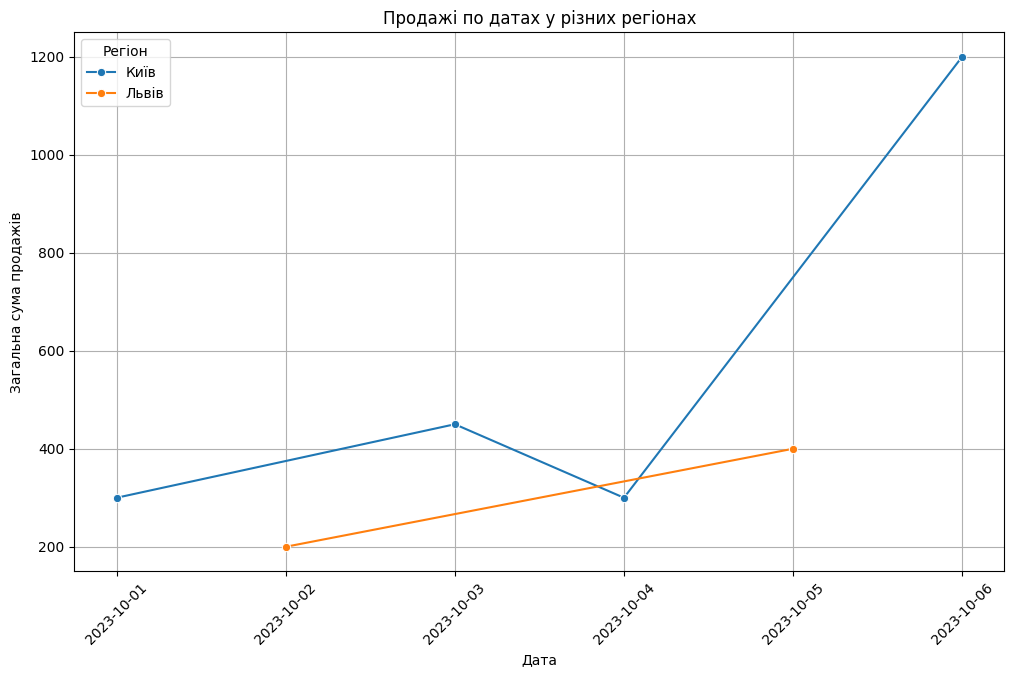

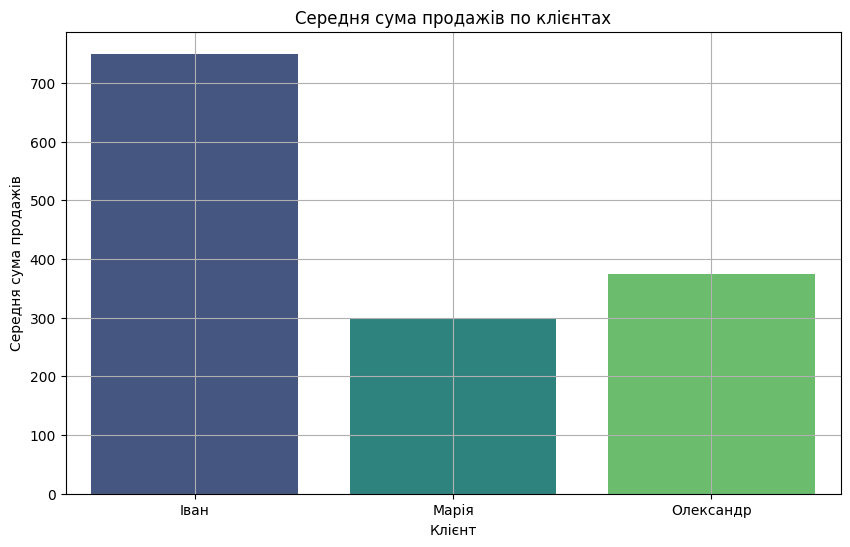

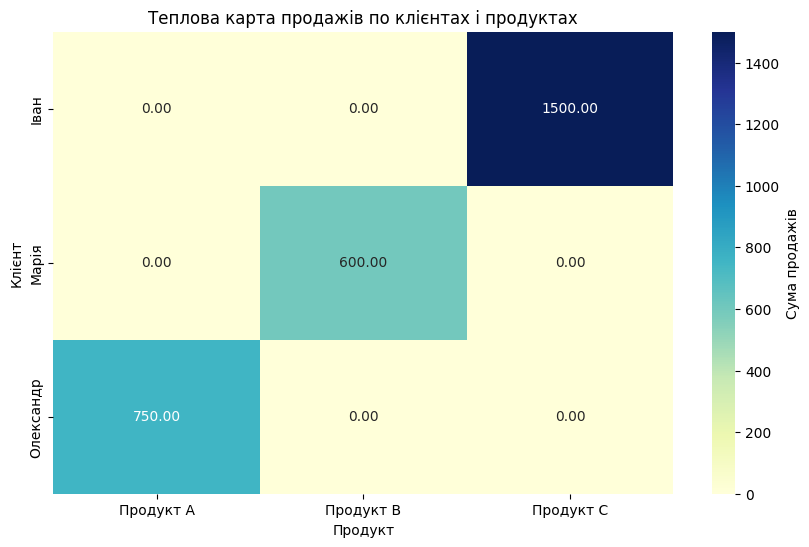

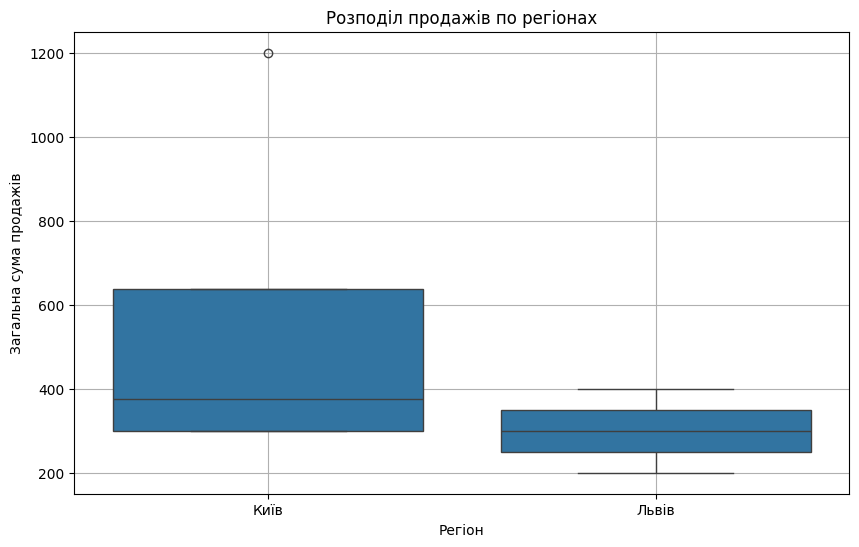

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Створення даних для таблиць

# Таблиця клієнтів
customers_data = {
    'customer_id': [1, 2, 3],
    'name': ['Олександр', 'Марія', 'Іван'],
    'region_id': [1, 2, 1]
}
customers = pd.DataFrame(customers_data)

# Таблиця продуктів
products_data = {
    'product_id': [101, 102, 103],
    'product_name': ['Продукт A', 'Продукт B', 'Продукт C'],
    'price': [150, 200, 300]
}
products = pd.DataFrame(products_data)

# Таблиця регіонів
regions_data = {
    'region_id': [1, 2],
    'region_name': ['Київ', 'Львів']
}
regions = pd.DataFrame(regions_data)

# Таблиця продажів із датами
sales_data = {
    'sale_id': [1, 2, 3, 4, 5, 6],
    'customer_id': [1, 2, 1, 3, 2, 3],
    'product_id': [101, 102, 101, 103, 102, 103],
    'date': ['2023-10-01', '2023-10-02', '2023-10-03', '2023-10-04', '2023-10-05', '2023-10-06'],
    'quantity': [2, 1, 3, 1, 2, 4]
}
sales = pd.DataFrame(sales_data)
sales['date'] = pd.to_datetime(sales['date'])  # Перетворення дати

# Злиття таблиць
full_data = pd.merge(sales, customers, on='customer_id', how='left')
full_data = pd.merge(full_data, products, on='product_id', how='left')
full_data = pd.merge(full_data, regions, on='region_id', how='left')
full_data['total_sale'] = full_data['price'] * full_data['quantity']

# Функція для створення міри загальних продажів
def total_sales(data):
    """Міра загальних продажів за всіма клієнтами."""
    return data['total_sale'].sum()

# Перевірка міри на всіх даних
total_sales_all = total_sales(full_data)
print(f'Загальна сума продажів за всіма клієнтами: {total_sales_all}')

# Функція для створення міри середніх продажів по клієнтах
def average_sales_per_customer(data):
    """Міра середніх продажів по клієнтах."""
    return data.groupby('name')['total_sale'].mean()

# Перевірка міри середніх продажів для кожного клієнта
avg_sales_per_customer = average_sales_per_customer(full_data)
print('Середня сума продажів по клієнтах:')
print(avg_sales_per_customer)

# Візуалізація 1: Продажі по датах у різних регіонах
plt.figure(figsize=(12, 7))
sns.lineplot(data=full_data, x='date', y='total_sale', hue='region_name', marker='o')
plt.title('Продажі по датах у різних регіонах')
plt.xlabel('Дата')
plt.ylabel('Загальна сума продажів')
plt.legend(title='Регіон')
plt.grid()
plt.xticks(rotation=45)
plt.show()

# Візуалізація 2: Сума продажів по клієнтах
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_sales_per_customer.reset_index(), x='name', y='total_sale', hue='name', palette='viridis', dodge=False, legend=False)
plt.title('Середня сума продажів по клієнтах')
plt.xlabel('Клієнт')
plt.ylabel('Середня сума продажів')
plt.grid()
plt.show()

# Візуалізація 3: Теплова карта продажів по клієнтах і продуктах
sales_per_product = full_data.groupby(['name', 'product_name'])['total_sale'].sum().unstack().fillna(0)
plt.figure(figsize=(10, 6))
sns.heatmap(sales_per_product, annot=True, fmt='.2f', cmap='YlGnBu', cbar_kws={'label': 'Сума продажів'})
plt.title('Теплова карта продажів по клієнтах і продуктах')
plt.xlabel('Продукт')
plt.ylabel('Клієнт')
plt.show()

# Візуалізація 4: Розподіл продажів по цінах
plt.figure(figsize=(10, 6))
sns.boxplot(data=full_data, x='region_name', y='total_sale')
plt.title('Розподіл продажів по регіонах')
plt.xlabel('Регіон')
plt.ylabel('Загальна сума продажів')
plt.grid()
plt.show()

